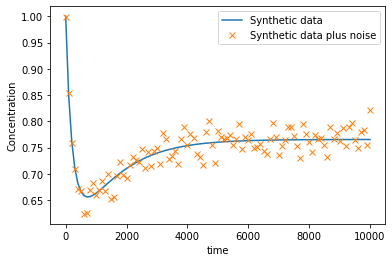

In [ ]:
import numpy as np
from scipy.integrate import odeint
from numpy import linspace, array
import pickle
import matplotlib.pyplot as plt

def myModelReversible(y, t, k_1, k_n1, k_2, k_n2):
    # y is a vector containing the current state of the system
    # this means it holds a value for
    E = y[0] # the enzyme
    S = y[1] # the substrate
    C = y[2] # the enzyme-substrate complex
    P = y[3] # ... and the product

    # these equations are determined from the reaction
    dy0 = (k_n1 + k_2)*C - k_1*E*S - k_n2*E*P
    dy1 = k_n1*C - k_1*E*S
    dy2 = k_1*E*S + k_n2*E*P - (k_n1 + k_2)*C
    dy3 = k_2*C - k_n2*E*P;
    return [dy0, dy1, dy2, dy3]

# Define the kinetic constants
k_1 = 0.002; k_n1 = 0.001; k_2 = 0.001; k_n2 = 0.0005
params2 = (k_1, k_n1, k_2, k_n2)

# y0 is the initial vector [E_0 S_0 C_0 P_0]
# set the substrate concentration equal to the enzyme concentration
y0 = [1., 1., 0., 0.]

# define the time points at which to evaluate the analytical solution
times = linspace(0.,10000.,101)
# now find the numerical solution using "odeint" for the same initial vector
y = odeint(myModelReversible, y0, times, params2)
# add some experimental noise to the dependent variable values
# use normal (Gaussian) noise with a s.d. of 0.025
fracnoise = 0.025
randnoise = np.random.randn(y.shape[0],y.shape[1])*fracnoise
ynoisy = y + np.multiply(randnoise,y)
plt.figure()
plt.plot(times,y[:,0],label='Synthetic data')
plt.plot(times,ynoisy[:,0], 'x', label='Synthetic data plus noise')
plt.xlabel('time');
plt.ylabel('Concentration');
plt.legend()
#plt.savefig('lec25fig1.png', bbox_inches='tight')
plt.show(block=False)

# save the simulated results into a file
f = open('lecture25experimentaldata.pckl','wb')
syndata=np.zeros((len(times),len(y0)+1))
syndata[:,0] = times
syndata[:,1:len(y0)+1] = ynoisy
pickle.dump(syndata, f)
f.close()


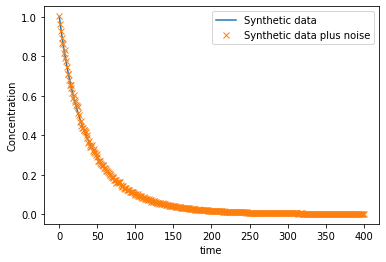

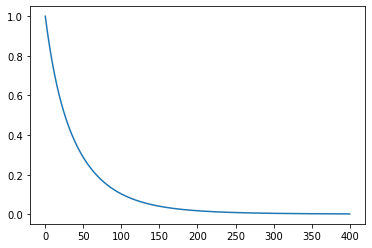

In [ ]:
### Recitation 7 ###

#Part 1
def HW7ModelA(y, t, k_1, k_n1, k_2, k_n2, k_3):

  # y is a vector containing the current state of the system
  # this means it holds a value for
  A = y[0] # Acontinine
  B = y[1] # Acetate
  C = y[2] # Benzoylaconine
  D = y[3] # Benzoic Acid
  E = y[4] # Aconine
  F = y[5] # Mesaconitine

  dy = [None] * len(y) # define

  dy[0] = (B*C*k_n1) - (A*k_1)
  dy[1] = (A*k_1) - (B*C*k_n1) - (B*E*k_3)
  dy[2] = (A*k_1) - (B*C*k_n1) - (C*k_2) + (D*E*k_n2)
  dy[3] = (C*k_2) - (D*E*k_n2)
  dy[4] = (C*k_2) - (D*E*k_n2) - (B*E*k_3)
  dy[5] = B*E*k_3

  dy = array(dy)
  return dy

#Part 2
k_1=0.03; k_n1=0.1; k_2=0.3; k_n2=0.2; k_3=0.2
params = (k_1,k_n1,k_2,k_n2,k_3)
# A(0)=1, and B(0)=C(0)=D(0)=E(0)=F(0)=0.
yinit = [1,0,0,0,0,0]
times = linspace(0.,400.,401) # t = 0,400

y = odeint(HW7ModelA, yinit, times, params)

fractnoise = 0.025
randnoise = np.random.randn(y.shape[0],y.shape[1])*fractnoise
ynoisy = y + np.multiply(randnoise,y)

plt.figure()
plt.plot(times,y[:,0],label='Synthetic data')
plt.plot(times,ynoisy[:,0], 'x', label='Synthetic data plus noise')
plt.xlabel('time');
plt.ylabel('Concentration');
plt.legend()
#plt.savefig('lec25fig1.png', bbox_inches='tight')
plt.show(block=False)

f = open('exercise7data.pckl', 'wb')
syndata = np.zeros((len(times),len(yinit)+1))
syndata[:,0] = times
syndata[:,1:len(yinit)+1] = ynoisy
pickle.dump(syndata, f)
f.close()



plt.figure()
plt.plot(times,y[:,0],label='Synthetic data')


